In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

# Teams df:

In [2]:
df_teams = pd.read_csv('data/Teams.csv')
df_teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [3]:
# drop cols
cols = ['teamID','lgID','divID','Rank','G','Ghome','L','CS','HBP','IPouts','name','park','attendance','teamIDBR','teamIDlahman45','teamIDretro']
df_teams.drop(cols, axis=1, inplace=True)
df_teams.head()

,yearID,franchID,W,DivWin,WCWin,LgWin,WSWin,R,AB,H,...,SV,HA,HRA,BBA,SOA,E,DP,FP,BPF,PPF
0,1871,BNA,20,NaN,NaN,N,NaN,401,1372,426,...,3,367,2,42,23,243,24,0.834,103,98
1,1871,CNA,19,NaN,NaN,N,NaN,302,1196,323,...,1,308,6,28,22,229,16,0.829,104,102
2,1871,CFC,10,NaN,NaN,N,NaN,249,1186,328,...,0,346,13,53,34,234,15,0.818,96,100
3,1871,KEK,7,NaN,NaN,N,NaN,137,746,178,...,0,261,5,21,17,163,8,0.803,101,107
4,1871,NNA,16,NaN,NaN,N,NaN,302,1404,403,...,0,373,7,42,22,235,14,0.840,90,88


In [4]:
# dummy championships
cols = ['DivWin','WCWin','LgWin','WSWin']
dummy_df = pd.get_dummies(df_teams[cols], drop_first=True)
dummy_df.head()

,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [5]:
df_teams = pd.concat([df_teams, dummy_df], axis=1)
df_teams.drop(['DivWin','WCWin','LgWin','WSWin'], axis=1, inplace=True)
df_teams.head()

,yearID,franchID,W,R,AB,H,2B,3B,HR,BB,...,SOA,E,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y
0,1871,BNA,20,401,1372,426,70,37,3,60.0,...,23,243,24,0.834,103,98,0,0,0,0
1,1871,CNA,19,302,1196,323,52,21,10,60.0,...,22,229,16,0.829,104,102,0,0,0,0
2,1871,CFC,10,249,1186,328,35,40,7,26.0,...,34,234,15,0.818,96,100,0,0,0,0
3,1871,KEK,7,137,746,178,19,8,2,33.0,...,17,163,8,0.803,101,107,0,0,0,0
4,1871,NNA,16,302,1404,403,43,21,1,33.0,...,22,235,14,0.840,90,88,0,0,0,0


In [6]:
# feature engineer team run diff and batting avg.
df_teams['run_diff'] = (df_teams['R'] - df_teams['RA'])
df_teams['ba'] = (df_teams['H'] / df_teams['AB'])
df_teams.tail()

,yearID,franchID,W,R,AB,H,2B,3B,HR,BB,...,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba
2950,2020,STL,30,240,1752,410,73,7,51,205.0,...,46,0.983,97,96,0,1,0,0,11,0.234018
2951,2020,TBD,40,289,1975,470,105,12,80,243.0,...,52,0.985,96,95,1,0,1,0,60,0.237975
2952,2020,TEX,22,224,1936,420,80,9,62,167.0,...,40,0.981,102,102,0,0,0,0,-88,0.216942
2953,2020,TOR,32,302,2023,516,104,4,88,203.0,...,47,0.982,100,99,0,1,0,0,-10,0.255067
2954,2020,WSN,26,293,1968,519,112,12,66,192.0,...,48,0.981,103,102,0,0,0,0,-8,0.263720


In [7]:
# filter db to years 2000 - 2019
df_teams = df_teams.loc[(df_teams['yearID']>1999) & (df_teams['yearID']<2020)]
df_teams

,yearID,franchID,W,R,AB,H,2B,3B,HR,BB,...,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba
2325,2000,ANA,82,864,5628,1574,309,34,236,608.0,...,182,0.978,102,103,0,0,0,0,-5,0.279673
2326,2000,ARI,85,792,5527,1466,282,44,179,535.0,...,138,0.982,105,103,0,0,0,0,38,0.265243
2327,2000,ATL,95,810,5489,1490,274,26,179,595.0,...,138,0.979,101,99,1,0,0,0,96,0.271452
2328,2000,BAL,74,794,5549,1508,310,22,184,558.0,...,151,0.981,95,96,0,0,0,0,-119,0.271761
2329,2000,BOS,85,792,5630,1503,316,32,167,611.0,...,120,0.982,104,103,0,0,0,0,47,0.266963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2019,STL,91,764,5449,1336,246,24,210,561.0,...,168,0.989,98,97,1,0,0,0,102,0.245183
2921,2019,TBD,96,769,5628,1427,291,29,217,542.0,...,126,0.985,97,96,0,1,0,0,113,0.253554
2922,2019,TEX,78,810,5540,1374,296,24,223,534.0,...,143,0.982,111,112,0,0,0,0,-68,0.248014
2923,2019,TOR,67,726,5493,1299,270,21,247,509.0,...,141,0.984,97,98,0,0,0,0,-102,0.236483


In [8]:
kcr = df_teams.loc[df_teams['franchID']=='STL']
kcr

,yearID,franchID,W,R,AB,H,2B,3B,HR,BB,...,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba
2351,2000,STL,95,887,5478,1481,259,25,235,675.0,...,148,0.981,102,101,1,0,0,0,116,0.270354
2381,2001,STL,93,814,5450,1469,274,32,199,529.0,...,156,0.982,100,99,0,1,0,0,130,0.269541
2411,2002,STL,97,787,5505,1475,285,26,175,542.0,...,168,0.983,98,97,1,0,0,0,139,0.267938
2441,2003,STL,85,876,5672,1580,342,32,196,580.0,...,138,0.987,97,96,0,0,0,0,80,0.278561
2471,2004,STL,105,855,5555,1544,319,24,214,548.0,...,154,0.985,100,99,1,0,1,0,196,0.277948
2500,2005,STL,100,805,5538,1494,287,26,170,534.0,...,196,0.984,101,100,1,0,0,0,171,0.269772
2530,2006,STL,83,781,5522,1484,292,27,184,531.0,...,170,0.984,99,99,1,0,1,1,19,0.268743
2560,2007,STL,78,725,5529,1513,279,13,141,506.0,...,155,0.980,99,99,0,0,0,0,-104,0.273648
2590,2008,STL,86,779,5636,1585,283,26,174,577.0,...,156,0.986,99,99,0,0,0,0,54,0.281228
2620,2009,STL,91,730,5465,1436,294,29,160,528.0,...,167,0.985,98,97,1,0,0,0,90,0.262763


In [9]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 2325 to 2924
Data columns (total 34 columns):
yearID      600 non-null int64
franchID    600 non-null object
W           600 non-null int64
R           600 non-null int64
AB          600 non-null int64
H           600 non-null int64
2B          600 non-null int64
3B          600 non-null int64
HR          600 non-null int64
BB          600 non-null float64
SO          600 non-null float64
SB          600 non-null float64
SF          600 non-null float64
RA          600 non-null int64
ER          600 non-null int64
ERA         600 non-null float64
CG          600 non-null int64
SHO         600 non-null int64
SV          600 non-null int64
HA          600 non-null int64
HRA         600 non-null int64
BBA         600 non-null int64
SOA         600 non-null int64
E           600 non-null int64
DP          600 non-null int64
FP          600 non-null float64
BPF         600 non-null int64
PPF         600 non-null int64
DivWin_Y  

In [10]:
kcr_wins = df_teams.groupby(['franchID'])['W'].sum()

In [11]:
kcr_wins

franchID
ANA    1722
ARI    1598
ATL    1735
BAL    1453
BOS    1792
CHC    1624
CHW    1600
CIN    1526
CLE    1671
COL    1521
DET    1511
FLA    1518
HOU    1621
KCR    1430
LAD    1781
MIL    1565
MIN    1628
NYM    1608
NYY    1886
OAK    1729
PHI    1637
PIT    1473
SDP    1508
SEA    1595
SFG    1676
STL    1812
TBD    1554
TEX    1619
TOR    1599
WSN    1590
Name: W, dtype: int64

# EDA & Feature Engineer:

In [12]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 2325 to 2924
Data columns (total 34 columns):
yearID      600 non-null int64
franchID    600 non-null object
W           600 non-null int64
R           600 non-null int64
AB          600 non-null int64
H           600 non-null int64
2B          600 non-null int64
3B          600 non-null int64
HR          600 non-null int64
BB          600 non-null float64
SO          600 non-null float64
SB          600 non-null float64
SF          600 non-null float64
RA          600 non-null int64
ER          600 non-null int64
ERA         600 non-null float64
CG          600 non-null int64
SHO         600 non-null int64
SV          600 non-null int64
HA          600 non-null int64
HRA         600 non-null int64
BBA         600 non-null int64
SOA         600 non-null int64
E           600 non-null int64
DP          600 non-null int64
FP          600 non-null float64
BPF         600 non-null int64
PPF         600 non-null int64
DivWin_Y  

In [13]:
wins_df = df_teams.groupby(['franchID'])['W'].sum()

In [14]:
wins_df = pd.DataFrame(wins_df).sort_values('W', ascending=False)
wins_df

,W
franchID,
NYY,1886
STL,1812
BOS,1792
LAD,1781
ATL,1735
OAK,1729
ANA,1722
SFG,1676
CLE,1671


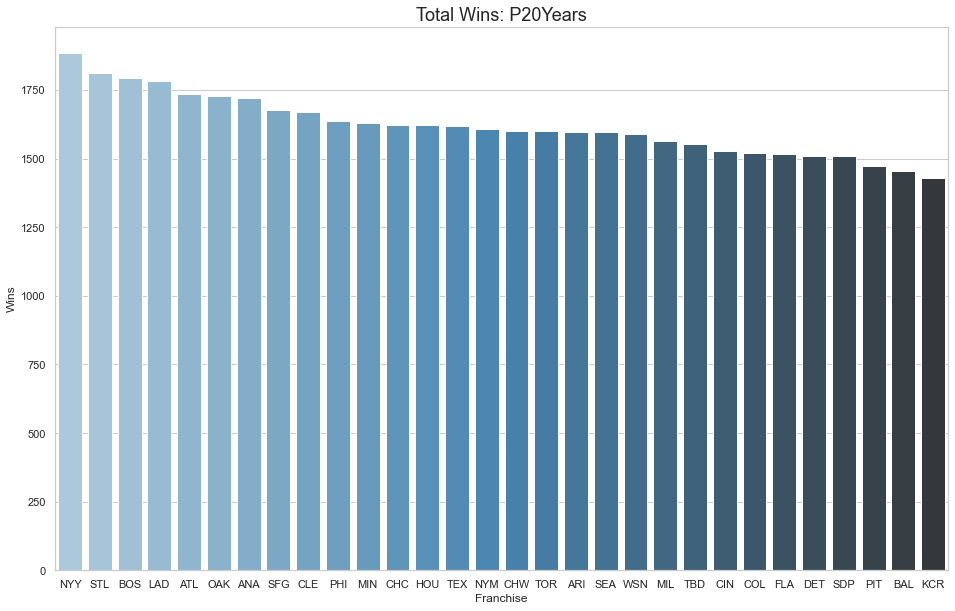

In [15]:
# show 10, 5, 3 for wins, runs, era
fig,ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x=wins_df.index, y='W', data=wins_df, palette='Blues_d')
ax.set_title("Total Wins: P20Years", fontsize=18)
ax.set(xlabel='Franchise', ylabel='Wins')
plt.show()

In [16]:
# filter db to P5Years, 2015 - 2019
df_p5y = df_teams.loc[(df_teams['yearID']>2014)]
df_p5y

,yearID,franchID,W,R,AB,H,2B,3B,HR,BB,...,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba
2775,2015,ARI,79,720,5649,1494,289,48,154,490.0,...,146,0.986,107,106,0,0,0,0,7,0.264472
2776,2015,ATL,67,573,5420,1361,251,18,100,471.0,...,186,0.985,97,97,0,0,0,0,-187,0.251107
2777,2015,BAL,81,713,5485,1370,246,20,217,418.0,...,134,0.987,103,104,0,0,0,0,20,0.249772
2778,2015,BOS,78,748,5640,1495,294,33,161,478.0,...,148,0.984,104,107,0,0,0,0,-5,0.265071
2779,2015,CHW,76,622,5533,1381,260,27,136,404.0,...,159,0.983,92,93,0,0,0,0,-79,0.249593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2019,STL,91,764,5449,1336,246,24,210,561.0,...,168,0.989,98,97,1,0,0,0,102,0.245183
2921,2019,TBD,96,769,5628,1427,291,29,217,542.0,...,126,0.985,97,96,0,1,0,0,113,0.253554
2922,2019,TEX,78,810,5540,1374,296,24,223,534.0,...,143,0.982,111,112,0,0,0,0,-68,0.248014
2923,2019,TOR,67,726,5493,1299,270,21,247,509.0,...,141,0.984,97,98,0,0,0,0,-102,0.236483


In [17]:
df_p5y_grouped = df_p5y.groupby(['franchID'])['W'].sum()

In [18]:
df_p5y_grouped = pd.DataFrame(df_p5y_grouped).sort_values('W', ascending=False)
df_p5y_grouped

,W
franchID,
LAD,485
HOU,481
CHC,471
NYY,465
CLE,461
BOS,456
WSN,450
STL,448
TBD,414


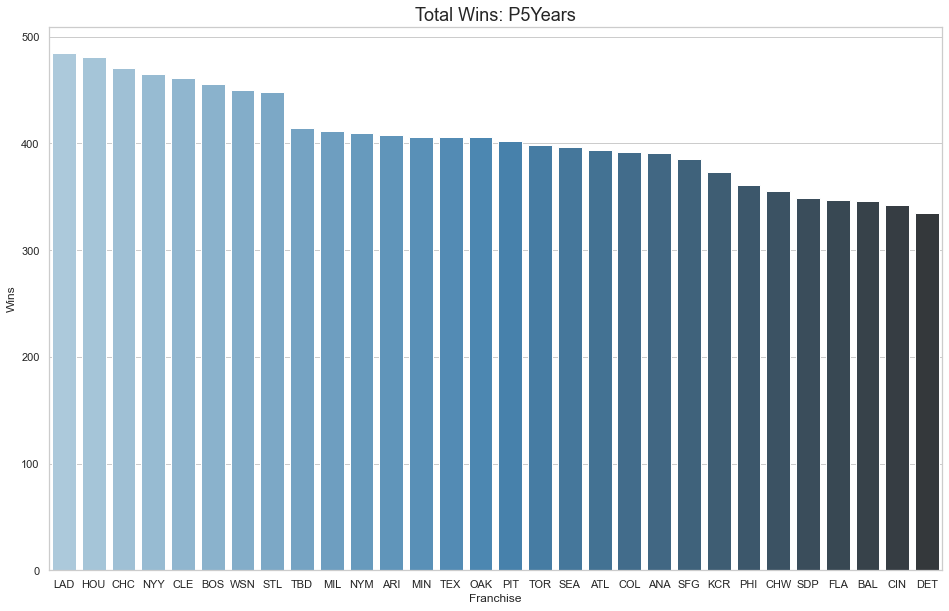

In [19]:
# P5Years
fig,ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x=df_p5y_grouped.index, y='W', data=df_p5y_grouped, palette='Blues_d')
ax.set_title("Total Wins: P5Years", fontsize=18)
ax.set(xlabel='Franchise', ylabel='Wins')
plt.show()

In [20]:
# P20Years and P5Years dfs
print(df_teams.shape)
print(df_p5y.shape)

(600, 34)
(150, 34)


In [21]:
df_p5y

,yearID,franchID,W,R,AB,H,2B,3B,HR,BB,...,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba
2775,2015,ARI,79,720,5649,1494,289,48,154,490.0,...,146,0.986,107,106,0,0,0,0,7,0.264472
2776,2015,ATL,67,573,5420,1361,251,18,100,471.0,...,186,0.985,97,97,0,0,0,0,-187,0.251107
2777,2015,BAL,81,713,5485,1370,246,20,217,418.0,...,134,0.987,103,104,0,0,0,0,20,0.249772
2778,2015,BOS,78,748,5640,1495,294,33,161,478.0,...,148,0.984,104,107,0,0,0,0,-5,0.265071
2779,2015,CHW,76,622,5533,1381,260,27,136,404.0,...,159,0.983,92,93,0,0,0,0,-79,0.249593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2019,STL,91,764,5449,1336,246,24,210,561.0,...,168,0.989,98,97,1,0,0,0,102,0.245183
2921,2019,TBD,96,769,5628,1427,291,29,217,542.0,...,126,0.985,97,96,0,1,0,0,113,0.253554
2922,2019,TEX,78,810,5540,1374,296,24,223,534.0,...,143,0.982,111,112,0,0,0,0,-68,0.248014
2923,2019,TOR,67,726,5493,1299,270,21,247,509.0,...,141,0.984,97,98,0,0,0,0,-102,0.236483


# Add New Stats (xwoba, xobp, linedrivepercent):

In [22]:
df_newstats = pd.read_csv('data/new_stats.csv')
df_newstats

,franchID,yearID,linedrivepercent,xobp,xwoba
0,ANA,2015,27.2,0.304,0.304
1,ARI,2015,29.1,0.306,0.303
2,ATL,2015,25.8,0.307,0.294
3,BAL,2015,26.4,0.297,0.307
4,BOS,2015,23.9,0.307,0.304
...,...,...,...,...,...
145,STL,2019,24.9,0.317,0.315
146,TBD,2019,25.6,0.326,0.327
147,TEX,2019,25.6,0.315,0.317
148,TOR,2019,24.5,0.307,0.312


In [23]:
df_p5y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 2775 to 2924
Data columns (total 34 columns):
yearID      150 non-null int64
franchID    150 non-null object
W           150 non-null int64
R           150 non-null int64
AB          150 non-null int64
H           150 non-null int64
2B          150 non-null int64
3B          150 non-null int64
HR          150 non-null int64
BB          150 non-null float64
SO          150 non-null float64
SB          150 non-null float64
SF          150 non-null float64
RA          150 non-null int64
ER          150 non-null int64
ERA         150 non-null float64
CG          150 non-null int64
SHO         150 non-null int64
SV          150 non-null int64
HA          150 non-null int64
HRA         150 non-null int64
BBA         150 non-null int64
SOA         150 non-null int64
E           150 non-null int64
DP          150 non-null int64
FP          150 non-null float64
BPF         150 non-null int64
PPF         150 non-null int64
DivWin_Y  

In [24]:
df_p5y.set_index(['yearID','franchID'], inplace=True)
df_newstats.set_index(['yearID','franchID'], inplace=True)

In [25]:
yearly_df = df_p5y.join(df_newstats, how='inner', lsuffix='teams_', rsuffix='stats_')
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 150 entries, (2017, STL) to (2018, TBD)
Data columns (total 35 columns):
W                   150 non-null int64
R                   150 non-null int64
AB                  150 non-null int64
H                   150 non-null int64
2B                  150 non-null int64
3B                  150 non-null int64
HR                  150 non-null int64
BB                  150 non-null float64
SO                  150 non-null float64
SB                  150 non-null float64
SF                  150 non-null float64
RA                  150 non-null int64
ER                  150 non-null int64
ERA                 150 non-null float64
CG                  150 non-null int64
SHO                 150 non-null int64
SV                  150 non-null int64
HA                  150 non-null int64
HRA                 150 non-null int64
BBA                 150 non-null int64
SOA                 150 non-null int64
E                   150 non-null int64
DP       

# Add Vegas Lines:

In [26]:
vegas_odds = pd.read_csv('data/vegas_mlb_seaswins.csv')
vegas_odds.head()

,year,Team,vegas_win_total
0,2014.0,ARI,80.5
1,2014.0,ATL,87.5
2,2014.0,BAL,81.5
3,2014.0,BOS,88.0
4,2014.0,CHC,69.5


In [27]:
print(vegas_odds.shape)

(240, 3)


In [28]:
vegas_odds.drop_duplicates(inplace=True)

In [29]:
vegas_odds.tail()

,year,Team,vegas_win_total
176,2019.0,TBD,85.5
177,2019.0,TEX,70.5
178,2019.0,TOR,76.5
179,2019.0,WSN,88.5
180,NaN,NaN,NaN


In [30]:
# remove last row - should be 180 rows
vegas_odds = vegas_odds.iloc[:-1 , :]

In [31]:
vegas_odds.year.value_counts()

2015.0    30
2019.0    30
2018.0    30
2017.0    30
2016.0    30
2014.0    30
Name: year, dtype: int64

In [32]:
# rename columns and lowercase all columns
vegas_odds = vegas_odds.rename(columns={'year': 'yearID', 
                                            'Team': 'franchID'}) 

In [33]:
yearly_df

W    R    AB     H   2B  3B   HR     BB      SO     SB  ...  \
yearID franchID                                                           ...   
2017   STL       83  761  5470  1402  284  28  196  593.0  1348.0   81.0  ...   
2015   MIL       68  655  5480  1378  274  34  145  412.0  1299.0   84.0  ...   
2017   ARI       93  812  5525  1405  314  39  220  578.0  1456.0  103.0  ...   
2019   ANA       72  769  5542  1368  268  21  220  586.0  1276.0   65.0  ...   
2017   ANA       80  710  5415  1314  251  14  186  523.0  1198.0  136.0  ...   
...              ..  ...   ...   ...  ...  ..  ...    ...     ...    ...  ...   
2015   SDP       74  650  5457  1324  260  36  148  426.0  1327.0   82.0  ...   
2016   PIT       78  729  5542  1426  277  32  153  561.0  1334.0  110.0  ...   
       WSN       95  763  5490  1403  268  29  203  536.0  1252.0  121.0  ...   
2017   DET       64  735  5556  1435  289  35  187  503.0  1313.0   65.0  ...   
2018   TBD       90  716  5475  1415  274  43  150  540.0  1388.0  128.0  ...   

                 PPF  DivWin_Y  WCWin_Y  LgWin_Y  WSWin_Y  run_diff        ba  \
yearID franchID                                                                 
2017   STL        98         0        0        0        0        56  0.256307   
2015   MIL       101         0        0        0        0       -82  0.251460   
2017   ARI       110         0        1        0        0       153  0.254299   
2019   ANA        98         0        0        0        0       -99  0.246842   
2017   ANA        96         0        0        0        0         1  0.242659   
...              ...       ...      ...      ...      ...       ...       ...   
2015   SDP        97         0        0        0        0       -81  0.242624   
2016   PIT       101         0        0        0        0       -29  0.257308   
       WSN        98         1        0        0        0       151  0.255556   
2017   DET       104         0        0        0        0      -159  0.258279   
2018   TBD        97         0        0        0        0        70  0.258447   

                 linedrivepercent   xobp  xwoba  
yearID franchID                                  
2017   STL                   25.8  0.330  0.326  
2015   MIL                   27.0  0.290  0.289  
2017   ARI                   25.5  0.323  0.319  
2019   ANA                   25.2  0.327  0.321  
2017   ANA                   23.4  0.318  0.312  
...                           ...    ...    ...  
2015   SDP                   25.9  0.286  0.285  
2016   PIT                   26.0  0.313  0.301  
       WSN                   26.1  0.313  0.310  
2017   DET                   27.7  0.329  0.332  
2018   TBD                   25.3  0.317  0.307  

[150 rows x 35 columns]

In [34]:
vegas_odds.set_index(['yearID','franchID'], inplace=True)

In [35]:
yearly_df = yearly_df.join(vegas_odds, how='inner', lsuffix='teams_', rsuffix='stats_')
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 150 entries, (2017, STL) to (2018, TBD)
Data columns (total 36 columns):
W                   150 non-null int64
R                   150 non-null int64
AB                  150 non-null int64
H                   150 non-null int64
2B                  150 non-null int64
3B                  150 non-null int64
HR                  150 non-null int64
BB                  150 non-null float64
SO                  150 non-null float64
SB                  150 non-null float64
SF                  150 non-null float64
RA                  150 non-null int64
ER                  150 non-null int64
ERA                 150 non-null float64
CG                  150 non-null int64
SHO                 150 non-null int64
SV                  150 non-null int64
HA                  150 non-null int64
HRA                 150 non-null int64
BBA                 150 non-null int64
SOA                 150 non-null int64
E                   150 non-null int64
DP       

In [36]:
yearly_df

W    R    AB     H   2B  3B   HR     BB      SO     SB  ...  \
yearID franchID                                                           ...   
2017   STL       83  761  5470  1402  284  28  196  593.0  1348.0   81.0  ...   
2015   MIL       68  655  5480  1378  274  34  145  412.0  1299.0   84.0  ...   
2017   ARI       93  812  5525  1405  314  39  220  578.0  1456.0  103.0  ...   
2019   ANA       72  769  5542  1368  268  21  220  586.0  1276.0   65.0  ...   
2017   ANA       80  710  5415  1314  251  14  186  523.0  1198.0  136.0  ...   
...              ..  ...   ...   ...  ...  ..  ...    ...     ...    ...  ...   
2015   SDP       74  650  5457  1324  260  36  148  426.0  1327.0   82.0  ...   
2016   PIT       78  729  5542  1426  277  32  153  561.0  1334.0  110.0  ...   
       WSN       95  763  5490  1403  268  29  203  536.0  1252.0  121.0  ...   
2017   DET       64  735  5556  1435  289  35  187  503.0  1313.0   65.0  ...   
2018   TBD       90  716  5475  1415  274  43  150  540.0  1388.0  128.0  ...   

                 DivWin_Y  WCWin_Y  LgWin_Y  WSWin_Y  run_diff        ba  \
yearID franchID                                                            
2017   STL              0        0        0        0        56  0.256307   
2015   MIL              0        0        0        0       -82  0.251460   
2017   ARI              0        1        0        0       153  0.254299   
2019   ANA              0        0        0        0       -99  0.246842   
2017   ANA              0        0        0        0         1  0.242659   
...                   ...      ...      ...      ...       ...       ...   
2015   SDP              0        0        0        0       -81  0.242624   
2016   PIT              0        0        0        0       -29  0.257308   
       WSN              1        0        0        0       151  0.255556   
2017   DET              0        0        0        0      -159  0.258279   
2018   TBD              0        0        0        0        70  0.258447   

                 linedrivepercent   xobp  xwoba  vegas_win_total  
yearID franchID                                                   
2017   STL                   25.8  0.330  0.326             86.0  
2015   MIL                   27.0  0.290  0.289             78.5  
2017   ARI                   25.5  0.323  0.319             77.5  
2019   ANA                   25.2  0.327  0.321             83.5  
2017   ANA                   23.4  0.318  0.312             79.5  
...                           ...    ...    ...              ...  
2015   SDP                   25.9  0.286  0.285             84.5  
2016   PIT                   26.0  0.313  0.301             86.0  
       WSN                   26.1  0.313  0.310             88.0  
2017   DET                   27.7  0.329  0.332             82.5  
2018   TBD                   25.3  0.317  0.307             76.5  

[150 rows x 36 columns]

In [37]:
yearly_df.reset_index(inplace=True)

In [38]:
# P20Years and P5Years dfs
# P5Years has xwoba, xobp, linedrivepercent
print(df_teams.shape)
print(yearly_df.shape)

(600, 34)
(150, 38)


In [39]:
import pickle
df_teams.to_pickle('df_teams.pkl')
yearly_df.to_pickle('yearly_df.pkl')

# Gamelogs df:

In [40]:
df_gamelogs = pd.read_csv('data/gamelogs.csv')
df_gamelogs.head()

,date,dayofweek,visiting_team,v_game_number,home_team,h_game_number,v_score,h_score,LOG_inouts,LOG_minutes,...,h_BB,h_K,h_SB,h_GIDP,h_LOB,h_pitchers_used,h_ER,h_def_assists,h_errors_def,h_doubleplays_def
0,20190320,Wed,SEA,1,OAK,1,9,7,54,204.0,...,3,8,0,2,4,7,9,4,0,0
1,20190321,Thu,SEA,2,OAK,2,5,4,72,267.0,...,6,10,0,1,12,8,5,8,0,1
2,20190328,Thu,PIT,1,CIN,1,3,5,51,174.0,...,3,8,0,0,5,6,3,8,0,0
3,20190328,Thu,ARI,1,LAD,1,5,12,51,169.0,...,3,3,0,0,3,3,5,8,0,1
4,20190328,Thu,COL,1,FLA,1,6,3,54,175.0,...,1,7,0,0,4,5,5,7,2,1


In [41]:
df_gamelogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14577 entries, 0 to 14576
Data columns (total 46 columns):
date                 14577 non-null int64
dayofweek            14577 non-null object
visiting_team        14577 non-null object
v_game_number        14577 non-null int64
home_team            14577 non-null object
h_game_number        14577 non-null int64
v_score              14577 non-null int64
h_score              14577 non-null int64
LOG_inouts           14577 non-null int64
LOG_minutes          14561 non-null float64
v_AB                 14577 non-null int64
v_H                  14577 non-null int64
v_2B                 14577 non-null int64
v_3B                 14577 non-null object
v_HR                 14577 non-null int64
v_RBI                14577 non-null int64
v_SF                 14577 non-null int64
v_HBP                14577 non-null int64
v_BB                 14577 non-null int64
v_K                  14577 non-null int64
v_SB                 14577 non-null int64
v_G

In [42]:
df_gamelogs['LOG_minutes'].fillna(method='backfill', inplace=True)
df_gamelogs.isna().sum()

date                 0
dayofweek            0
visiting_team        0
v_game_number        0
home_team            0
h_game_number        0
v_score              0
h_score              0
LOG_inouts           0
LOG_minutes          0
v_AB                 0
v_H                  0
v_2B                 0
v_3B                 0
v_HR                 0
v_RBI                0
v_SF                 0
v_HBP                0
v_BB                 0
v_K                  0
v_SB                 0
v_GIDP               0
v_LOB                0
v_pitchers_used      0
v_ER                 0
v_def_assists        0
v_errors_def         0
v_doubleplays_def    0
h_AB                 0
h_H                  0
h_2B                 0
h_3B                 0
h_HR                 0
h_RBI                0
h_SF                 0
h_HBP                0
h_BB                 0
h_K                  0
h_SB                 0
h_GIDP               0
h_LOB                0
h_pitchers_used      0
h_ER                 0
h_def_assis

In [43]:
print(df_gamelogs.shape)

(14577, 46)


In [44]:
df_gamelogs['date'] = pd.to_datetime(df_gamelogs['date'], format='%Y%m%d')
df_gamelogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14577 entries, 0 to 14576
Data columns (total 46 columns):
date                 14577 non-null datetime64[ns]
dayofweek            14577 non-null object
visiting_team        14577 non-null object
v_game_number        14577 non-null int64
home_team            14577 non-null object
h_game_number        14577 non-null int64
v_score              14577 non-null int64
h_score              14577 non-null int64
LOG_inouts           14577 non-null int64
LOG_minutes          14577 non-null float64
v_AB                 14577 non-null int64
v_H                  14577 non-null int64
v_2B                 14577 non-null int64
v_3B                 14577 non-null object
v_HR                 14577 non-null int64
v_RBI                14577 non-null int64
v_SF                 14577 non-null int64
v_HBP                14577 non-null int64
v_BB                 14577 non-null int64
v_K                  14577 non-null int64
v_SB                 14577 non-null 

In [45]:
df_gamelogs.describe()

,v_game_number,h_game_number,v_score,h_score,LOG_inouts,LOG_minutes,v_AB,v_H,v_2B,v_HR,...,h_BB,h_K,h_SB,h_GIDP,h_LOB,h_pitchers_used,h_ER,h_def_assists,h_errors_def,h_doubleplays_def
count,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,1.457700e+04,14577.000000,...,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000
mean,81.484050,81.483090,4.392399,4.514166,53.611237,186.156685,68.878439,8.882898,7.131777e+05,1.182891,...,3.156617,7.832887,0.519791,0.728751,6.733210,4.298964,4.054401,9.822666,0.578102,0.921932
std,46.755527,46.758215,3.176191,3.121854,5.108213,28.070783,1058.686948,7.268996,8.300581e+07,1.651273,...,2.000916,2.994815,0.847064,0.844344,2.604372,1.401130,3.014940,3.165103,0.797195,1.304628
min,1.000000,1.000000,0.000000,0.000000,27.000000,75.000000,17.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,41.000000,2.000000,2.000000,51.000000,168.000000,32.000000,6.000000,1.000000e+00,0.000000,...,2.000000,6.000000,0.000000,0.000000,5.000000,3.000000,2.000000,8.000000,0.000000,0.000000
50%,82.000000,81.000000,4.000000,4.000000,54.000000,183.000000,34.000000,8.000000,1.000000e+00,1.000000,...,3.000000,8.000000,0.000000,1.000000,7.000000,4.000000,3.000000,10.000000,0.000000,1.000000
75%,122.000000,122.000000,6.000000,6.000000,54.000000,200.000000,37.000000,11.000000,3.000000e+00,2.000000,...,4.000000,10.000000,1.000000,1.000000,8.000000,5.000000,6.000000,12.000000,1.000000,1.000000
max,163.000000,163.000000,24.000000,25.000000,114.000000,413.000000,41567.000000,273.000000,1.002000e+10,47.000000,...,14.000000,26.000000,8.000000,6.000000,24.000000,13.000000,23.000000,28.000000,5.000000,39.000000


In [46]:
df_gamelogs.columns

Index(['date', 'dayofweek', 'visiting_team', 'v_game_number', 'home_team',
       'h_game_number', 'v_score', 'h_score', 'LOG_inouts', 'LOG_minutes',
       'v_AB', 'v_H', 'v_2B', 'v_3B', 'v_HR', 'v_RBI', 'v_SF', 'v_HBP', 'v_BB',
       'v_K', 'v_SB', 'v_GIDP', 'v_LOB', 'v_pitchers_used', 'v_ER',
       'v_def_assists', 'v_errors_def', 'v_doubleplays_def', 'h_AB', 'h_H',
       'h_2B', 'h_3B', 'h_HR', 'h_RBI', 'h_SF', 'h_HBP', 'h_BB', 'h_K', 'h_SB',
       'h_GIDP', 'h_LOB', 'h_pitchers_used', 'h_ER', 'h_def_assists',
       'h_errors_def', 'h_doubleplays_def'],
      dtype='object')

In [47]:
df_gamelogs.set_index('date', inplace=True)

In [48]:
df_gamelogs = df_gamelogs.sort_index()
df_gamelogs.head(10)

,dayofweek,visiting_team,v_game_number,home_team,h_game_number,v_score,h_score,LOG_inouts,LOG_minutes,v_AB,...,h_BB,h_K,h_SB,h_GIDP,h_LOB,h_pitchers_used,h_ER,h_def_assists,h_errors_def,h_doubleplays_def
date,,,,,,,,,,,,,,,,,,,,,
2014-03-22,Sat,LAD,1,ARI,1,3,1,54,169.0,33,...,2,10,0,0,7,5,3,10,1,0
2014-03-23,Sun,LAD,2,ARI,2,7,5,54,241.0,34,...,8,8,0,2,11,6,6,15,3,1
2014-03-30,Sun,LAD,3,SDP,1,1,3,51,169.0,31,...,4,10,1,2,6,5,1,10,0,0
2014-03-31,Mon,ATL,1,MIL,1,0,2,51,165.0,31,...,1,3,2,1,4,4,0,13,0,0
2014-03-31,Mon,WSN,1,NYM,1,9,7,60,227.0,38,...,3,18,0,0,3,7,9,11,0,0
2014-03-31,Mon,COL,1,FLA,1,1,10,51,178.0,32,...,2,11,0,0,7,3,1,9,0,1
2014-03-31,Mon,STL,1,CIN,1,1,0,54,176.0,32,...,5,12,1,1,9,3,1,11,0,0
2014-03-31,Mon,SFG,1,ARI,3,9,8,54,205.0,38,...,3,9,1,1,11,5,9,10,1,0
2014-03-31,Mon,PHI,1,TEX,1,14,10,54,216.0,44,...,4,4,0,1,7,5,14,8,1,0


In [62]:
df_gamelogs.to_pickle('df_gamelogs.pkl')

# Rolling Statistics:

filtered only on mets because I need a function to do the below, but for all teams

In [49]:
df_mets = df_gamelogs.loc[(df_gamelogs['visiting_team']=='NYM') | (df_gamelogs['home_team']=='NYM')]
df_mets.head(15)

,dayofweek,visiting_team,v_game_number,home_team,h_game_number,v_score,h_score,LOG_inouts,LOG_minutes,v_AB,...,h_BB,h_K,h_SB,h_GIDP,h_LOB,h_pitchers_used,h_ER,h_def_assists,h_errors_def,h_doubleplays_def
date,,,,,,,,,,,,,,,,,,,,,
2014-03-31,Mon,WSN,1,NYM,1,9,7,60,227.0,38,...,3,18,0,0,3,7,9,11,0,0
2014-04-02,Wed,WSN,2,NYM,2,5,1,54,180.0,40,...,2,13,0,0,4,3,5,6,0,0
2014-04-03,Thu,WSN,3,NYM,3,8,2,54,201.0,37,...,4,8,0,1,8,5,7,11,2,2
2014-04-04,Fri,CIN,4,NYM,4,3,4,51,179.0,34,...,3,4,0,0,5,4,3,11,1,1
2014-04-05,Sat,CIN,5,NYM,5,3,6,51,168.0,33,...,5,10,0,1,6,3,3,6,0,0
2014-04-06,Sun,CIN,6,NYM,6,2,1,54,155.0,33,...,1,8,0,0,4,4,2,9,0,0
2014-04-08,Tue,NYM,7,ATL,7,4,0,54,187.0,34,...,0,6,0,0,10,6,4,6,0,0
2014-04-09,Wed,NYM,8,ATL,8,3,4,51,160.0,33,...,0,8,0,0,5,3,3,10,0,0
2014-04-10,Thu,NYM,9,ATL,9,6,4,54,206.0,36,...,4,11,1,1,6,5,5,9,1,0


In [50]:
# combine 2 columns, based on condition of another column
df_mets['runs_scored'] = df_mets.apply(lambda x: x['v_score'] if x['visiting_team'] == 'NYM' else x['h_score'], axis = 1)
df_mets['runs_against'] = df_mets.apply(lambda x: x['h_score'] if x['visiting_team'] == 'NYM' else x['v_score'], axis = 1)
df_mets.tail(10)

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dayofweek,visiting_team,v_game_number,home_team,h_game_number,v_score,h_score,LOG_inouts,LOG_minutes,v_AB,...,h_SB,h_GIDP,h_LOB,h_pitchers_used,h_ER,h_def_assists,h_errors_def,h_doubleplays_def,runs_scored,runs_against
date,,,,,,,,,,,,,,,,,,,,,
2019-09-20,Fri,NYM,153,CIN,154,8,1,54,186.0,37,...,4,1,6,3,8,11,1,0,8,1
2019-09-21,Sat,NYM,154,CIN,155,2,3,51,168.0,30,...,0,0,9,5,1,8,1,0,2,3
2019-09-22,Sun,NYM,155,CIN,156,6,3,54,188.0,36,...,0,0,9,3,6,8,0,0,6,3
2019-09-23,Mon,FLA,156,NYM,156,8,4,54,205.0,37,...,0,0,11,7,8,15,0,2,4,8
2019-09-24,Tue,FLA,157,NYM,157,4,5,64,231.0,43,...,1,0,10,7,4,9,0,0,5,4
2019-09-25,Wed,FLA,158,NYM,158,3,10,51,168.0,31,...,0,0,7,3,0,10,1,1,10,3
2019-09-26,Thu,FLA,159,NYM,159,4,2,54,165.0,33,...,1,1,6,3,4,8,0,0,2,4
2019-09-27,Fri,ATL,160,NYM,160,2,4,51,189.0,35,...,0,1,8,3,2,11,0,0,4,2
2019-09-28,Sat,ATL,161,NYM,161,0,3,51,153.0,31,...,0,1,1,4,0,8,0,0,3,0


In [51]:
# get rolling stats
df_mets['mets_roll3_rs'] = df_mets['runs_scored'].transform(lambda s: s.rolling(3, min_periods=1).sum())
df_mets['mets_roll5_rs'] = df_mets['runs_scored'].transform(lambda s: s.rolling(5, min_periods=1).sum())
df_mets['mets_roll10_rs'] = df_mets['runs_scored'].transform(lambda s: s.rolling(10, min_periods=1).sum())
df_mets['mets_roll3_ra'] = df_mets['runs_against'].transform(lambda s: s.rolling(3, min_periods=1).sum())
df_mets['mets_roll5_ra'] = df_mets['runs_against'].transform(lambda s: s.rolling(5, min_periods=1).sum())
df_mets['mets_roll10_ra'] = df_mets['runs_against'].transform(lambda s: s.rolling(10, min_periods=1).sum())
df_mets.head(15)

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,dayofweek,visiting_team,v_game_number,home_team,h_game_number,v_score,h_score,LOG_inouts,LOG_minutes,v_AB,...,h_errors_def,h_doubleplays_def,runs_scored,runs_against,mets_roll3_rs,mets_roll5_rs,mets_roll10_rs,mets_roll3_ra,mets_roll5_ra,mets_roll10_ra
date,,,,,,,,,,,,,,,,,,,,,
2014-03-31,Mon,WSN,1,NYM,1,9,7,60,227.0,38,...,0,0,7,9,7.0,7.0,7.0,9.0,9.0,9.0
2014-04-02,Wed,WSN,2,NYM,2,5,1,54,180.0,40,...,0,0,1,5,8.0,8.0,8.0,14.0,14.0,14.0
2014-04-03,Thu,WSN,3,NYM,3,8,2,54,201.0,37,...,2,2,2,8,10.0,10.0,10.0,22.0,22.0,22.0
2014-04-04,Fri,CIN,4,NYM,4,3,4,51,179.0,34,...,1,1,4,3,7.0,14.0,14.0,16.0,25.0,25.0
2014-04-05,Sat,CIN,5,NYM,5,3,6,51,168.0,33,...,0,0,6,3,12.0,20.0,20.0,14.0,28.0,28.0
2014-04-06,Sun,CIN,6,NYM,6,2,1,54,155.0,33,...,0,0,1,2,11.0,14.0,21.0,8.0,21.0,30.0
2014-04-08,Tue,NYM,7,ATL,7,4,0,54,187.0,34,...,0,0,4,0,11.0,17.0,25.0,5.0,16.0,30.0
2014-04-09,Wed,NYM,8,ATL,8,3,4,51,160.0,33,...,0,0,3,4,8.0,18.0,28.0,6.0,12.0,34.0
2014-04-10,Thu,NYM,9,ATL,9,6,4,54,206.0,36,...,1,0,6,4,13.0,20.0,34.0,8.0,13.0,38.0


In [52]:
# calculate rolling run diff
df_mets['mets_roll3_rundiff'] = df_mets['mets_roll3_rs'] - df_mets['mets_roll3_ra']
df_mets['mets_roll5_rundiff'] = df_mets['mets_roll5_rs'] - df_mets['mets_roll5_ra']
df_mets['mets_roll10_rundiff'] = df_mets['mets_roll10_rs'] - df_mets['mets_roll10_ra']
df_mets.head(15)

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,dayofweek,visiting_team,v_game_number,home_team,h_game_number,v_score,h_score,LOG_inouts,LOG_minutes,v_AB,...,runs_against,mets_roll3_rs,mets_roll5_rs,mets_roll10_rs,mets_roll3_ra,mets_roll5_ra,mets_roll10_ra,mets_roll3_rundiff,mets_roll5_rundiff,mets_roll10_rundiff
date,,,,,,,,,,,,,,,,,,,,,
2014-03-31,Mon,WSN,1,NYM,1,9,7,60,227.0,38,...,9,7.0,7.0,7.0,9.0,9.0,9.0,-2.0,-2.0,-2.0
2014-04-02,Wed,WSN,2,NYM,2,5,1,54,180.0,40,...,5,8.0,8.0,8.0,14.0,14.0,14.0,-6.0,-6.0,-6.0
2014-04-03,Thu,WSN,3,NYM,3,8,2,54,201.0,37,...,8,10.0,10.0,10.0,22.0,22.0,22.0,-12.0,-12.0,-12.0
2014-04-04,Fri,CIN,4,NYM,4,3,4,51,179.0,34,...,3,7.0,14.0,14.0,16.0,25.0,25.0,-9.0,-11.0,-11.0
2014-04-05,Sat,CIN,5,NYM,5,3,6,51,168.0,33,...,3,12.0,20.0,20.0,14.0,28.0,28.0,-2.0,-8.0,-8.0
2014-04-06,Sun,CIN,6,NYM,6,2,1,54,155.0,33,...,2,11.0,14.0,21.0,8.0,21.0,30.0,3.0,-7.0,-9.0
2014-04-08,Tue,NYM,7,ATL,7,4,0,54,187.0,34,...,0,11.0,17.0,25.0,5.0,16.0,30.0,6.0,1.0,-5.0
2014-04-09,Wed,NYM,8,ATL,8,3,4,51,160.0,33,...,4,8.0,18.0,28.0,6.0,12.0,34.0,2.0,6.0,-6.0
2014-04-10,Thu,NYM,9,ATL,9,6,4,54,206.0,36,...,4,13.0,20.0,34.0,8.0,13.0,38.0,5.0,7.0,-4.0


In [53]:
# creates new column and populates np.where(condition, if true, if false)
df_mets['game_result'] = np.where(df_mets['runs_scored'] - df_mets['runs_against']>0, 1, 0)

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
# Mets record 2014 - 2019
df_mets.game_result.value_counts()

1    489
0    483
Name: game_result, dtype: int64

In [58]:
df_mets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 972 entries, 2014-03-31 to 2019-09-29
Data columns (total 55 columns):
visiting_team          972 non-null object
v_game_number          972 non-null int64
home_team              972 non-null object
h_game_number          972 non-null int64
v_score                972 non-null int64
h_score                972 non-null int64
LOG_inouts             972 non-null int64
LOG_minutes            972 non-null float64
v_AB                   972 non-null int64
v_H                    972 non-null int64
v_2B                   972 non-null int64
v_HR                   972 non-null int64
v_RBI                  972 non-null int64
v_SF                   972 non-null int64
v_HBP                  972 non-null int64
v_BB                   972 non-null int64
v_K                    972 non-null int64
v_SB                   972 non-null int64
v_GIDP                 972 non-null int64
v_LOB                  972 non-null int64
v_pitchers_used        972 non-n

In [57]:
cols = ['v_3B','dayofweek']
df_mets.drop(cols, axis=1, inplace=True)

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [2]:
df_mets.to_pickle('df_mets.pkl')

NameError: name 'df_mets' is not defined

In [3]:
df_mets2 = pd.read_pickle('df_mets.pkl')
df_mets2.head()

,visiting_team,v_game_number,home_team,h_game_number,v_score,h_score,LOG_inouts,LOG_minutes,v_AB,v_H,...,mets_roll3_rs,mets_roll5_rs,mets_roll10_rs,mets_roll3_ra,mets_roll5_ra,mets_roll10_ra,mets_roll3_rundiff,mets_roll5_rundiff,mets_roll10_rundiff,game_result
date,,,,,,,,,,,,,,,,,,,,,
2014-03-31,WSN,1,NYM,1,9,7,60,227.0,38,9,...,7.0,7.0,7.0,9.0,9.0,9.0,-2.0,-2.0,-2.0,0
2014-04-02,WSN,2,NYM,2,5,1,54,180.0,40,13,...,8.0,8.0,8.0,14.0,14.0,14.0,-6.0,-6.0,-6.0,0
2014-04-03,WSN,3,NYM,3,8,2,54,201.0,37,13,...,10.0,10.0,10.0,22.0,22.0,22.0,-12.0,-12.0,-12.0,0
2014-04-04,CIN,4,NYM,4,3,4,51,179.0,34,8,...,7.0,14.0,14.0,16.0,25.0,25.0,-9.0,-11.0,-11.0,1
2014-04-05,CIN,5,NYM,5,3,6,51,168.0,33,7,...,12.0,20.0,20.0,14.0,28.0,28.0,-2.0,-8.0,-8.0,1


# New df for rolling statistics:

In [39]:
pd.set_option('display.max_columns', None)
df = pd.read_pickle('df_gamelogs.pkl')
df.head()

,dayofweek,visiting_team,v_game_number,home_team,h_game_number,v_score,h_score,LOG_inouts,LOG_minutes,v_AB,v_H,v_2B,v_3B,v_HR,v_RBI,v_SF,v_HBP,v_BB,v_K,v_SB,v_GIDP,v_LOB,v_pitchers_used,v_ER,v_def_assists,v_errors_def,v_doubleplays_def,h_AB,h_H,h_2B,h_3B,h_HR,h_RBI,h_SF,h_HBP,h_BB,h_K,h_SB,h_GIDP,h_LOB,h_pitchers_used,h_ER,h_def_assists,h_errors_def,h_doubleplays_def
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-03-22,Sat,LAD,1,ARI,1,3,1,54,169.0,33,5,2,0,1,3,0,1,3,11,0,0,7,4,1,13,1,0,33,5,1,0,0,1,0,0,2,10,0,0,7,5,3,10,1,0
2014-03-23,Sun,LAD,2,ARI,2,7,5,54,241.0,34,13,3,0,0,6,2,2,8,7,1,1,13,8,5,4,1,2,35,8,0,0,1,5,0,0,8,8,0,2,11,6,6,15,3,1
2014-03-30,Sun,LAD,3,SDP,1,1,3,51,169.0,31,4,0,0,0,1,0,0,3,9,0,0,6,4,2,12,2,2,27,5,0,0,1,3,0,0,4,10,1,2,6,5,1,10,0,0
2014-03-31,Mon,ATL,1,MIL,1,0,2,51,165.0,31,5,1,0,0,0,0,0,2,7,0,0,7,3,2,11,1,2,28,8,1,0,0,2,0,0,1,3,2,1,4,4,0,13,0,0
2014-03-31,Mon,WSN,1,NYM,1,9,7,60,227.0,38,9,2,0,2,9,1,0,6,10,0,0,6,5,7,4,0,0,35,7,0,0,3,7,1,0,3,18,0,0,3,7,9,11,0,0


In [40]:
df.reset_index(inplace=True)

In [41]:
teams = list(df['visiting_team'].value_counts().index)
teams

['MIL',
 'COL',
 'ANA',
 'PIT',
 'SEA',
 'TBD',
 'CIN',
 'MIN',
 'NYM',
 'PHI',
 'HOU',
 'KCR',
 'BAL',
 'SDP',
 'NYY',
 'OAK',
 'TEX',
 'BOS',
 'CHC',
 'TOR',
 'LAD',
 'ARI',
 'CHW',
 'SFG',
 'STL',
 'WSN',
 'CLE',
 'FLA',
 'ATL',
 'DET']

In [42]:
#create blank df with whatever feature variable you want per team
new_df = pd.DataFrame(columns = ['date', 'team', 'team_score', 'opponent_score', 
       'Hits','RBI','doubles','strikeouts', 'def_assists', 'def_errors', 'def_doubleplays', 
       'pitchers_used'])

In [43]:
df.columns

Index(['date', 'dayofweek', 'visiting_team', 'v_game_number', 'home_team',
       'h_game_number', 'v_score', 'h_score', 'LOG_inouts', 'LOG_minutes',
       'v_AB', 'v_H', 'v_2B', 'v_3B', 'v_HR', 'v_RBI', 'v_SF', 'v_HBP', 'v_BB',
       'v_K', 'v_SB', 'v_GIDP', 'v_LOB', 'v_pitchers_used', 'v_ER',
       'v_def_assists', 'v_errors_def', 'v_doubleplays_def', 'h_AB', 'h_H',
       'h_2B', 'h_3B', 'h_HR', 'h_RBI', 'h_SF', 'h_HBP', 'h_BB', 'h_K', 'h_SB',
       'h_GIDP', 'h_LOB', 'h_pitchers_used', 'h_ER', 'h_def_assists',
       'h_errors_def', 'h_doubleplays_def'],
      dtype='object')

In [44]:
v_temp = df.loc[df['visiting_team'] == 'SEA',['date', 'visiting_team', 'v_score', 'h_score', 'v_H','v_RBI',
                                                          'v_2B','v_K','v_def_assists','v_errors_def','v_doubleplays_def','v_pitchers_used']].rename(columns={'visiting_team':'team', 'v_score':'team_score', 'h_score':'opponent_score',
                                                          'v_H': 'Hits','v_RBI': 'RBI', 'v_2B': 'doubles', 'v_K': 'strikeouts', 'v_def_assists': 'def_assists',
                                                          'v_errors_def': 'def_errors','v_doubleplays_def': 'def_doubleplays', 'v_pitchers_used': 'pitchers_used'})
v_temp

,date,team,team_score,opponent_score,Hits,RBI,doubles,strikeouts,def_assists,def_errors,def_doubleplays,pitchers_used
13,2014-03-31,SEA,10,3,11,10,4,11,5,1,0,5
21,2014-04-01,SEA,8,3,10,8,3,12,14,2,2,4
38,2014-04-02,SEA,8,2,13,8,2,9,11,0,1,3
45,2014-04-03,SEA,2,3,6,2,1,9,11,0,2,7
74,2014-04-05,SEA,3,1,7,3,2,9,7,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
14425,2019-09-18,SEA,4,1,7,4,2,10,12,0,2,4
14436,2019-09-19,SEA,6,5,13,5,1,12,13,1,0,8
14447,2019-09-20,SEA,3,5,4,3,1,5,9,0,1,4
14469,2019-09-21,SEA,7,6,11,6,1,10,16,2,1,10


In [45]:
h_temp = df.loc[df['home_team'] == 'SEA',['date', 'home_team', 'v_score', 'h_score', 'h_H','h_RBI',
                                                          'h_2B','h_K','h_def_assists','h_errors_def','h_doubleplays_def','h_pitchers_used']].rename(columns={'home_team':'team', 'h_score':'team_score', 'v_score':'opponent_score',
                                                          'h_H': 'Hits','h_RBI': 'RBI', 'h_2B': 'doubles', 'h_K': 'strikeouts', 'h_def_assists': 'def_assists',
                                                          'h_errors_def': 'def_errors','h_doubleplays_def': 'def_doubleplays', 'h_pitchers_used': 'pitchers_used'})
h_temp

,date,team,opponent_score,team_score,Hits,RBI,doubles,strikeouts,def_assists,def_errors,def_doubleplays,pitchers_used
107,2014-04-08,SEA,3,5,8,5,2,9,10,0,1,5
123,2014-04-09,SEA,2,0,1,0,0,9,9,0,0,5
149,2014-04-11,SEA,4,6,11,4,2,12,3,1,0,5
164,2014-04-12,SEA,3,1,7,1,1,11,9,0,1,3
178,2014-04-13,SEA,3,0,3,0,0,11,6,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
14509,2019-09-25,SEA,3,0,2,0,0,10,8,0,0,4
14522,2019-09-26,SEA,3,1,4,1,1,10,9,2,1,5
14534,2019-09-27,SEA,3,4,8,4,3,9,7,0,1,7
14548,2019-09-28,SEA,1,0,6,0,0,6,11,0,2,4


In [46]:
#loop through each team, create temp df for when they are home and away, rename columns to general form. Then concatenate rows to master df
for team in teams:
    v_temp = df.loc[df['visiting_team'] == team,['date', 'visiting_team', 'v_score', 'h_score', 'v_H','v_RBI',
                                                'v_2B','v_K','v_def_assists','v_errors_def','v_doubleplays_def','v_pitchers_used']].rename(columns={'visiting_team':'team', 'v_score':'team_score', 'h_score':'opponent_score',
                                                'v_H': 'Hits','v_RBI': 'RBI', 'v_2B': 'doubles', 'v_K': 'strikeouts', 'v_def_assists': 'def_assists',
                                                'v_errors_def': 'def_errors','v_doubleplays_def': 'def_doubleplays', 'v_pitchers_used': 'pitchers_used'})
    h_temp = df.loc[df['home_team'] == team,['date', 'home_team', 'v_score', 'h_score', 'h_H','h_RBI',
                                            'h_2B','h_K','h_def_assists','h_errors_def','h_doubleplays_def','h_pitchers_used']].rename(columns={'home_team':'team', 'h_score':'team_score', 'v_score':'opponent_score',
                                            'h_H': 'Hits','h_RBI': 'RBI', 'h_2B': 'doubles', 'h_K': 'strikeouts', 'h_def_assists': 'def_assists',
                                            'h_errors_def': 'def_errors','h_doubleplays_def': 'def_doubleplays', 'h_pitchers_used': 'pitchers_used'})
    new_df = pd.concat([new_df,v_temp,h_temp])

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [47]:
new_df.shape

(29154, 12)

In [48]:
new_df.head()

,Hits,RBI,date,def_assists,def_doubleplays,def_errors,doubles,opponent_score,pitchers_used,strikeouts,team,team_score
62,12,6,2014-04-04,7,2,1,4,2,4,6,MIL,6
71,19,7,2014-04-05,14,2,2,6,6,7,18,MIL,7
90,9,3,2014-04-06,10,0,1,2,0,3,8,MIL,4
104,15,9,2014-04-08,4,0,0,5,4,5,5,MIL,10
118,13,8,2014-04-09,11,1,1,3,4,3,13,MIL,9


In [49]:
new_df.sort_values('date', inplace= True)

In [50]:
new_df = new_df[['date', 'team', 'team_score', 'opponent_score', 
       'Hits','RBI','doubles','strikeouts', 'def_assists', 'def_errors', 'def_doubleplays', 
       'pitchers_used']]

In [51]:
new_df

,date,team,team_score,opponent_score,Hits,RBI,doubles,strikeouts,def_assists,def_errors,def_doubleplays,pitchers_used
0,2014-03-22,LAD,3,1,5,3,2,11,13,1,0,4
0,2014-03-22,ARI,1,3,5,1,1,10,10,1,0,5
1,2014-03-23,ARI,5,7,8,5,0,8,15,3,1,6
1,2014-03-23,LAD,7,5,13,6,3,7,4,1,2,8
2,2014-03-30,LAD,1,3,4,1,0,9,12,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
14575,2019-09-29,TEX,6,1,10,4,1,6,3,0,0,2
14564,2019-09-29,COL,4,3,8,3,0,15,9,1,0,8
14569,2019-09-29,CHC,0,9,3,0,0,7,5,0,1,5
14568,2019-09-29,LAD,9,0,12,9,1,8,10,0,2,8


In [53]:
new_df['Rolling3_runs_scored'] = new_df.groupby('team')['team_score'].transform(lambda x: x.rolling(3).sum().shift())
new_df['Rolling3_runs_against'] = new_df.groupby('team')['opponent_score'].transform(lambda x: x.rolling(3).sum().shift())
new_df['Rolling3_run_diff'] = new_df['Rolling3_runs_scored'] - new_df['Rolling3_runs_against']
new_df['Rolling3_hits'] = new_df.groupby('team')['Hits'].transform(lambda x: x.rolling(3).sum().shift())
new_df['Rolling3_RBI'] = new_df.groupby('team')['RBI'].transform(lambda x: x.rolling(3).sum().shift())
new_df['Rolling3_doubles'] = new_df.groupby('team')['doubles'].transform(lambda x: x.rolling(3).sum().shift())
new_df['Rolling3_strikeouts'] = new_df.groupby('team')['strikeouts'].transform(lambda x: x.rolling(3).sum().shift())
new_df['Rolling3_def_assists'] = new_df.groupby('team')['def_assists'].transform(lambda x: x.rolling(3).sum().shift())
new_df['Rolling3_def_errors'] = new_df.groupby('team')['def_errors'].transform(lambda x: x.rolling(3).sum().shift())
new_df['Rolling3_doubleplays'] = new_df.groupby('team')['def_doubleplays'].transform(lambda x: x.rolling(3).sum().shift())
new_df['Rolling3_pitchers_used'] = new_df.groupby('team')['pitchers_used'].transform(lambda x: x.rolling(3).sum().shift())

In [55]:
new_df['game_result'] = np.where(new_df['team_score'] - new_df['opponent_score']>0, 1, 0)

In [57]:
new_df.fillna(method='backfill', inplace=True)
new_df.isna().sum()

date                      0
team                      0
team_score                0
opponent_score            0
Hits                      0
RBI                       0
doubles                   0
strikeouts                0
def_assists               0
def_errors                0
def_doubleplays           0
pitchers_used             0
Rolling3_runs_scored      0
Rolling3_runs_against     0
Rolling3_run_diff         0
Rolling3_hits             0
Rolling3_RBI              0
Rolling3_doubles          0
Rolling3_strikeouts       0
Rolling3_def_assists      0
Rolling3_def_errors       0
Rolling3_doubleplays      0
Rolling3_pitchers_used    0
game_result               0
dtype: int64

In [59]:
new_df

,date,team,team_score,opponent_score,Hits,RBI,doubles,strikeouts,def_assists,def_errors,def_doubleplays,pitchers_used,Rolling3_runs_scored,Rolling3_runs_against,Rolling3_run_diff,Rolling3_hits,Rolling3_RBI,Rolling3_doubles,Rolling3_strikeouts,Rolling3_def_assists,Rolling3_def_errors,Rolling3_doubleplays,Rolling3_pitchers_used,game_result
0,2014-03-22,LAD,3,1,5,3,2,11,13,1,0,4,14.0,19.0,-5.0,29.0,14.0,4.0,27.0,35.0,5.0,1.0,16.0,1
0,2014-03-22,ARI,1,3,5,1,1,10,10,1,0,5,14.0,19.0,-5.0,29.0,14.0,4.0,27.0,35.0,5.0,1.0,16.0,0
1,2014-03-23,ARI,5,7,8,5,0,8,15,3,1,6,14.0,19.0,-5.0,29.0,14.0,4.0,27.0,35.0,5.0,1.0,16.0,0
1,2014-03-23,LAD,7,5,13,6,3,7,4,1,2,8,14.0,19.0,-5.0,29.0,14.0,4.0,27.0,35.0,5.0,1.0,16.0,1
2,2014-03-30,LAD,1,3,4,1,0,9,12,2,2,4,14.0,19.0,-5.0,29.0,14.0,4.0,27.0,35.0,5.0,1.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14575,2019-09-29,TEX,6,1,10,4,1,6,3,0,0,2,23.0,23.0,0.0,27.0,23.0,7.0,25.0,37.0,2.0,7.0,13.0,1
14564,2019-09-29,COL,4,3,8,3,0,15,9,1,0,8,17.0,17.0,0.0,29.0,16.0,5.0,32.0,33.0,1.0,5.0,16.0,1
14569,2019-09-29,CHC,0,9,3,0,0,7,5,0,1,5,21.0,17.0,4.0,32.0,20.0,6.0,32.0,20.0,4.0,2.0,18.0,0
14568,2019-09-29,LAD,9,0,12,9,1,8,10,0,2,8,12.0,2.0,10.0,21.0,12.0,5.0,30.0,16.0,2.0,0.0,15.0,1


In [61]:
check = new_df.loc[(new_df['team'] == 'NYM') | (new_df['team'] == 'NYM')]
check.head(20)

,date,team,team_score,opponent_score,Hits,RBI,doubles,strikeouts,def_assists,def_errors,def_doubleplays,pitchers_used,Rolling3_runs_scored,Rolling3_runs_against,Rolling3_run_diff,Rolling3_hits,Rolling3_RBI,Rolling3_doubles,Rolling3_strikeouts,Rolling3_def_assists,Rolling3_def_errors,Rolling3_doubleplays,Rolling3_pitchers_used,game_result
4,2014-03-31,NYM,7,9,7,7,0,18,11,0,0,7,14.0,19.0,-5.0,29.0,14.0,4.0,27.0,35.0,5.0,1.0,16.0,0
26,2014-04-02,NYM,1,5,3,1,1,13,6,0,0,3,18.0,20.0,-2.0,35.0,17.0,6.0,21.0,34.0,4.0,1.0,14.0,0
42,2014-04-03,NYM,2,8,7,2,3,8,11,2,2,5,10.0,19.0,-9.0,27.0,9.0,5.0,24.0,31.0,1.0,1.0,11.0,0
53,2014-04-04,NYM,4,3,6,4,1,4,11,1,1,4,10.0,22.0,-12.0,17.0,10.0,4.0,39.0,28.0,2.0,2.0,15.0,1
65,2014-04-05,NYM,6,3,6,6,1,10,6,0,0,3,7.0,16.0,-9.0,16.0,7.0,5.0,25.0,28.0,3.0,3.0,12.0,1
80,2014-04-06,NYM,1,2,4,1,2,8,9,0,0,4,12.0,14.0,-2.0,19.0,12.0,5.0,22.0,28.0,3.0,3.0,12.0,0
108,2014-04-08,NYM,4,0,9,3,1,9,8,2,0,3,11.0,8.0,3.0,16.0,11.0,4.0,22.0,26.0,1.0,1.0,11.0,1
129,2014-04-09,NYM,3,4,6,3,1,9,6,0,0,4,11.0,5.0,6.0,19.0,10.0,4.0,27.0,23.0,2.0,0.0,10.0,0
134,2014-04-10,NYM,6,4,9,6,1,9,12,0,1,4,8.0,6.0,2.0,19.0,7.0,4.0,26.0,23.0,2.0,0.0,11.0,1
153,2014-04-11,NYM,4,5,10,3,3,9,11,0,0,6,13.0,8.0,5.0,24.0,12.0,3.0,27.0,26.0,2.0,1.0,11.0,0


In [62]:
check.game_result.value_counts()

1    489
0    483
Name: game_result, dtype: int64

In [63]:
new_df.to_pickle('new_df.pkl')